In [58]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [23]:
data=('/content/drive/MyDrive/MY_data/test')
fruit=glob(data+'/*')
fruit


['/content/drive/MyDrive/MY_data/test/orange',
 '/content/drive/MyDrive/MY_data/test/stawberries',
 '/content/drive/MyDrive/MY_data/test/mango',
 '/content/drive/MyDrive/MY_data/test/watermelon',
 '/content/drive/MyDrive/MY_data/test/cherry',
 '/content/drive/MyDrive/MY_data/test/avocado',
 '/content/drive/MyDrive/MY_data/test/banana',
 '/content/drive/MyDrive/MY_data/test/apple',
 '/content/drive/MyDrive/MY_data/test/kiwi',
 '/content/drive/MyDrive/MY_data/test/pinenapple']

In [24]:
orange=list(glob(data+'/orange/*'))
strawberry=list(glob(data+'/stawberry/*'))
mango=list(glob(data+'/mango/*'))
watermelon=list(glob(data+'/watermelon/*'))
cherry=list(glob(data+'/cherry/*'))
avocado=list(glob(data+'/avocado/*'))
banana=list(glob(data+'/banana/*'))
apple=list(glob(data+'/apple/*'))
kiwi=list(glob(data+'/kiwi/*'))
pineapple=list(glob(data+'/pinenapple/*'))

In [25]:
len(mango),len(apple)

(105, 89)

In [26]:
input={'orange':orange,'stawberry':strawberry,'mango':mango,'watermelon':watermelon,'cherry':cherry,'avocado':avocado,'banana':banana,'apple':apple,'kiwi':kiwi,'pinenapple':pineapple}
output={'orange':0,'stawberry':1,'mango':2,'watermelon':3,'cherry':4,'avocado':5,'banana':6,'apple':7,'kiwi':8,'pinenapple':9}

In [27]:
input

{'orange': ['/content/drive/MyDrive/MY_data/test/orange/img_341.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_311.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_381.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_391.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_1911.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_281.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_231.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_351.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_291.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_1331.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_1431.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_221.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_121.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_1891.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_191.jpeg',
  '/content/drive/MyDrive/MY_data/test/orange/img_61.jpeg',
  '/content

In [28]:
output

{'orange': 0,
 'stawberry': 1,
 'mango': 2,
 'watermelon': 3,
 'cherry': 4,
 'avocado': 5,
 'banana': 6,
 'apple': 7,
 'kiwi': 8,
 'pinenapple': 9}

In [31]:
x=[]
y=[]
for fruit in input:
  path=input[fruit]
  for data in path:
    img_arr=cv2.imread(data)
    img_arr_resize=cv2.resize(img_arr,(224,224))
    img_arr_resize=img_arr_resize/255
    img_arr_resize=img_arr_resize.reshape(224,224,3,1)
    x.append(img_arr_resize)
    y.append(output[fruit])
    test=np.array(x)
    train=np.array(y)




In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [34]:
len(x_train),len(x_test)

(737, 185)

In [37]:
len(y_train),len(y_test)

(737, 185)

In [45]:
pip install tensorflow

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv3D,MaxPooling3D,BatchNormalization,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [51]:
model=Sequential()
model.add(Conv3D(filters=10,kernel_size=(2,2,3),input_shape=(224,224,3,1)))
model.add(Conv3D(filters=10,kernel_size=(2,2,1),activation='relu'))
model.add(Flatten())
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 223, 223, 1, 10)   130       
                                                                 
 conv3d_4 (Conv3D)           (None, 222, 222, 1, 10)   410       
                                                                 
 flatten (Flatten)           (None, 492840)            0         
                                                                 
 dense (Dense)               (None, 30)                14785230  
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 14786080 (56.40 MB)
Trainable params: 14786080 (56.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [56]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [63]:
fit=model.fit(x=x_train,y=y_train,batch_size=40,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
19/19 [==============================] - 1s 72ms/step - loss: 0.1913 - accuracy: 0.9701 - val_loss: 2.0382 - val_accuracy: 0.3405
Epoch 2/10
19/19 [==============================] - 1s 51ms/step - loss: 0.1141 - accuracy: 0.9810 - val_loss: 2.6215 - val_accuracy: 0.2973
Epoch 3/10
19/19 [==============================] - 1s 52ms/step - loss: 0.0958 - accuracy: 0.9946 - val_loss: 2.2804 - val_accuracy: 0.3297
Epoch 4/10
19/19 [==============================] - 1s 49ms/step - loss: 0.0616 - accuracy: 0.9905 - val_loss: 2.6616 - val_accuracy: 0.3405
Epoch 5/10
19/19 [==============================] - 1s 49ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 2.5751 - val_accuracy: 0.3676
Epoch 6/10
19/19 [==============================] - 1s 49ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.4531 - val_accuracy: 0.3730
Epoch 7/10
19/19 [==============================] - 1s 55ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 2.4530 - val_accuracy: 0.3946
Epoch 8/10
19

In [65]:
t_a=fit.history['accuracy']
v_a=fit.history['val_accuracy']
t_l=fit.history['loss']
v_l=fit.history['val_loss']

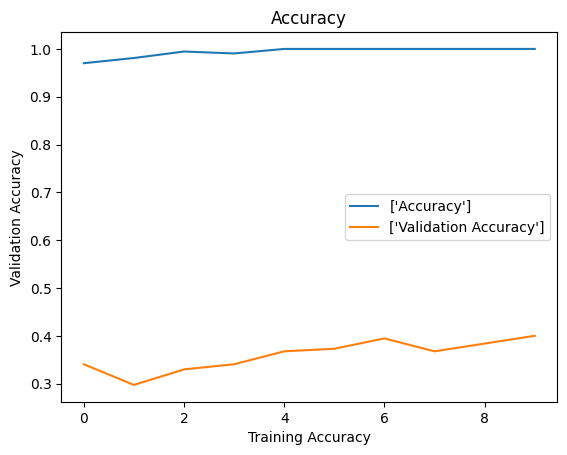

In [67]:
plt.plot(t_a,label=['Accuracy'])
plt.plot(v_a,label=['Validation Accuracy'])
plt.title('Accuracy')
plt.xlabel('Training Accuracy')
plt.ylabel('Validation Accuracy')
plt.legend()

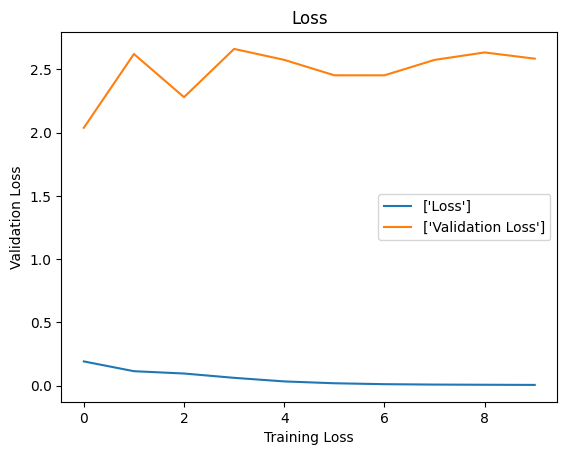

In [69]:
plt.plot(t_l,label=['Loss'])
plt.plot(v_l,label=['Validation Loss'])
plt.title('Loss')
plt.xlabel('Training Loss')
plt.ylabel('Validation Loss')
plt.legend()

In [73]:
img_arr=cv2.imread('/content/drive/MyDrive/MY_data/test/banana/img_01.jpeg')
test_set=[]
img_arr_resize=cv2.resize(img_arr,(224,224))
np.max(img_arr_resize)
img_arr_resize=img_arr_resize/255
img_arr_resize=img_arr_resize.reshape(224,224,3,1)
test_set.append(img_arr_resize)
test=np.array(test_set)
test.shape
result=model.predict(test)
np.argmax(result)

1/1 [==============================] - 0s 18ms/step


6